In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
file = open('Practice_FS/arcene_train.labels')
y_train = [int(line.strip()) for line in file]
file.close()

file = open('Practice_FS/arcene_valid.labels')
y_test = [int(line.strip()) for line in file]
file.close()

In [3]:
X_train = pd.read_table('Practice_FS/arcene_train.data', sep='\s+', header=None, nrows = len(y_train))
X_test = pd.read_table('Practice_FS/arcene_valid.data', sep='\s+', header=None, nrows = len(y_test))

In [4]:
X_train

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0      0    71     0    95     0   538   404    20     0     0  ...   255   
1      0    41    82   165    60   554   379     0    71     0  ...   213   
2      0     0     1    40     0   451   402     0     0     0  ...   235   
3      0    56    44   275    14   511   470     0     0     0  ...    91   
4    105     0   141   348     0   268   329     0     0     1  ...   813   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
95    24    26     0   461     0   545     0    17   159   177  ...   275   
96    40     0     0   419    71   502     0    39    93   163  ...   277   
97     2    15    48   677     0   434   442     0    43     0  ...   211   
98     8     0    38   205    69   419   454     0   113     3  ...   193   
99     0     0     0   148     0   583     0     6   130   112  ...   271   

    9991  9992  9993  9994  9995  9996  9997  9998  9999  
0    570    86     0    36     0    80     0     0   524  
1    605    69     7   473     0    57     0   284   423  
2    593    28     0    24     0    90     0    34   508  
3    600     0    26    86     0   102     0     0   469  
4      0     0     0     0   190   301     0     0   354  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...  
95   460    22    26   130   306   182     0    94   336  
96   436     0    68    61   295   133     0     0   292  
97   628     0     7   228     0   105     0     0   453  
98   587   148    27   656     0   133     0   189   403  
99   477     0     0   111   414   210     0    10   365  

[100 rows x 10000 columns]

In [5]:
X_test

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0      0     0   156   138     2   635   444     0     1     0  ...    88   
1      0     7     0     7     0   251     0     0    22   222  ...   698   
2      0    32     0   470    53   493     0     0   140   147  ...   267   
3      0    77     0   202     0   432   472     0    60     0  ...   181   
4      0    34   102   522     2   474   473     0    39     0  ...   114   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
95    24    73     0   436    92   400     0     0   139   261  ...   394   
96    11    58    50   332   109   393   122     0    75   134  ...   235   
97    93    32   137   319     0   264   231    21     0     0  ...   929   
98   119    12   198   339     0   289   410     0     0     4  ...   781   
99   112    19   171   334     0   282   208     0     0     0  ...   856   

    9991  9992  9993  9994  9995  9996  9997  9998  9999  
0    692    42     0    50    67    87     0     0   465  
1    673     0     0    18   201   317     0    34   199  
2    461    20    34   165   225    53     0    47   219  
3    555    13     0   488     0    71     0   177   487  
4    630     0    29   192     0    74     0     5   416  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...  
95   540     0    86   130   365    58    17     3    37  
96   355   156    77    26   277   265     0    36   261  
97     9     0     0     0   244   309     0   276   312  
98     0    37     0     0   256   402     0     0   350  
99     0   118     0     0   226   379     0     0   367  

[100 rows x 10000 columns]

In [6]:
spearman = pd.concat([X_train,pd.DataFrame(y_train)],axis=1).corr(method="spearman").iloc[-1]
spearman = spearman[0:-1]

In [7]:
from sklearn.feature_selection import mutual_info_classif
mutual_inf = mutual_info_classif(X_train, y_train, random_state=42)

In [8]:
pearson = pd.concat([X_train,pd.DataFrame(y_train)],axis=1).corr(method="pearson").iloc[-1]
pearson = pearson[0:-1]

In [9]:
#Отбор по корреляции Спирмена

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train_st = pd.DataFrame(scaler.fit_transform(X_train))
X_test_st = pd.DataFrame(scaler.fit_transform(X_test))

In [17]:
estimator = SVC(kernel="linear")

In [18]:
num = []
ac = []
for i in range(450):
    mask1 = spearman > 0.001*i
    mask2 = spearman < -0.001*i
    mask = mask1|mask2
    num.append(len(spearman[mask].index))
    ind_s = np.array(spearman[mask].index)
    X_train_s = X_train_st.iloc[:, ind_s]
    X_test_s = X_test_st.iloc[:, ind_s]
    estimator.fit(X_train_s, y_train)
    y_pred = estimator.predict(X_test_s)
    ac.append(accuracy_score(y_pred, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

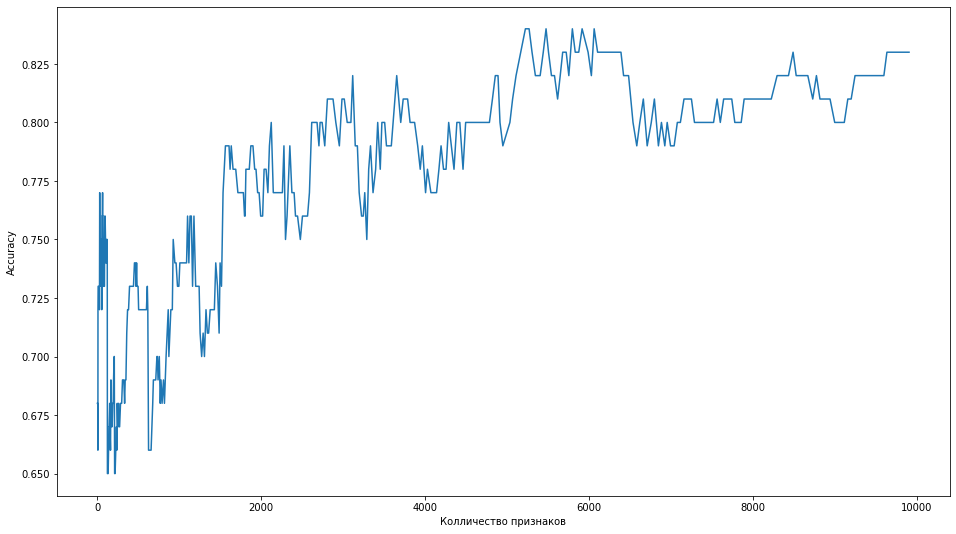

In [19]:
plt.figure(figsize=(16,9))
plt.plot(num, ac)
#plt.ylim(-0.01, 0.001)
plt.ylabel('Accuracy')
plt.xlabel("Колличество признаков")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

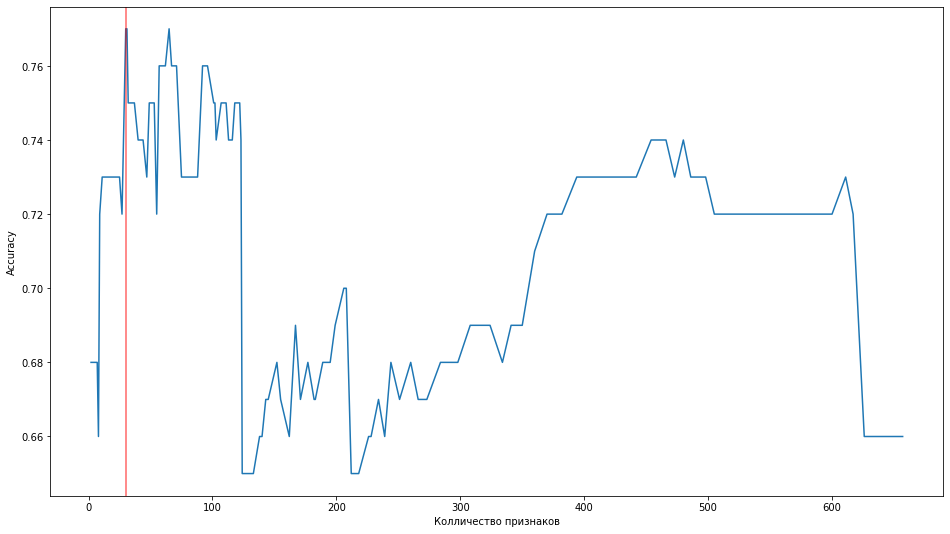

In [20]:
plt.figure(figsize=(16,9))
plt.plot(num[300:], ac[300:])
plt.axvline(x = 30, c='red', alpha=0.6)
plt.ylabel('Accuracy')
plt.xlabel("Колличество признаков")
plt.show

In [21]:
mask1 = spearman > 0.417
mask2 = spearman < -0.417
mask = mask1|mask2
len(spearman[mask].index)

31

In [22]:
ind_s = np.array(spearman[mask].index)

In [23]:
X_train_s = X_train.iloc[:, ind_s]
X_test_s = X_test.iloc[:, ind_s]

In [24]:
X_s_st = scaler.fit_transform(X_train_s)
X_test_s_st = scaler.fit_transform(X_test_s)

In [25]:
estimator = SVC(kernel="linear")
estimator.fit(X_s_st, y_train)
y_pred = estimator.predict(X_test_s_st)
print('acuracy:', accuracy_score(y_pred, y_test))

acuracy: 0.77


In [26]:
#Отбор по корреляции Пирсона

In [27]:
num = []
ac = []
for i in range(450):
    mask1 = pearson > 0.001*i
    mask2 = pearson < -0.001*i
    mask = mask1|mask2
    num.append(len(pearson[mask].index))
    ind_p = np.array(pearson[mask].index)
    X_train_p = X_train_st.iloc[:, ind_p]
    X_test_p = X_test_st.iloc[:, ind_p]
    estimator.fit(X_train_p, y_train)
    y_pred = estimator.predict(X_test_p)
    ac.append(accuracy_score(y_pred, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

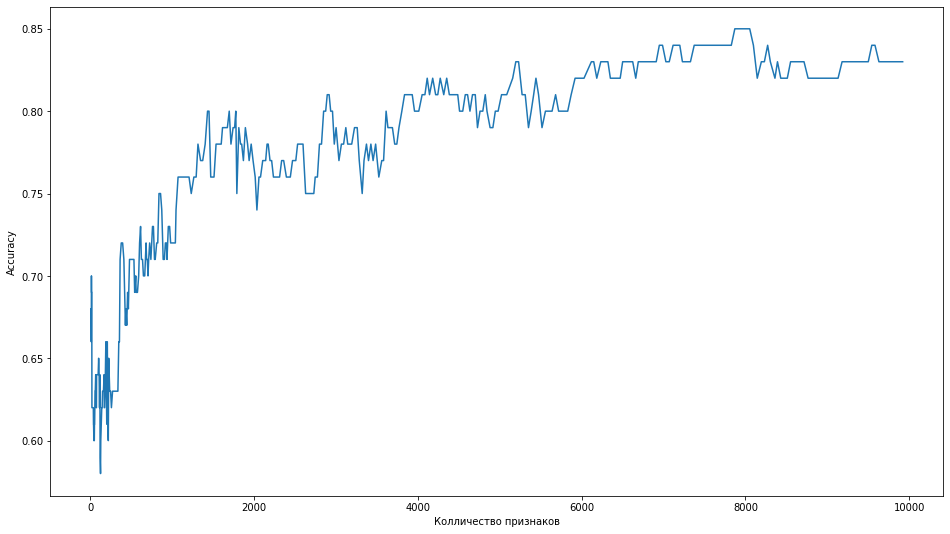

In [28]:
plt.figure(figsize=(16,9))
plt.plot(num, ac)
#plt.ylim(-0.01, 0.001)
plt.ylabel('Accuracy')
plt.xlabel("Колличество признаков")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

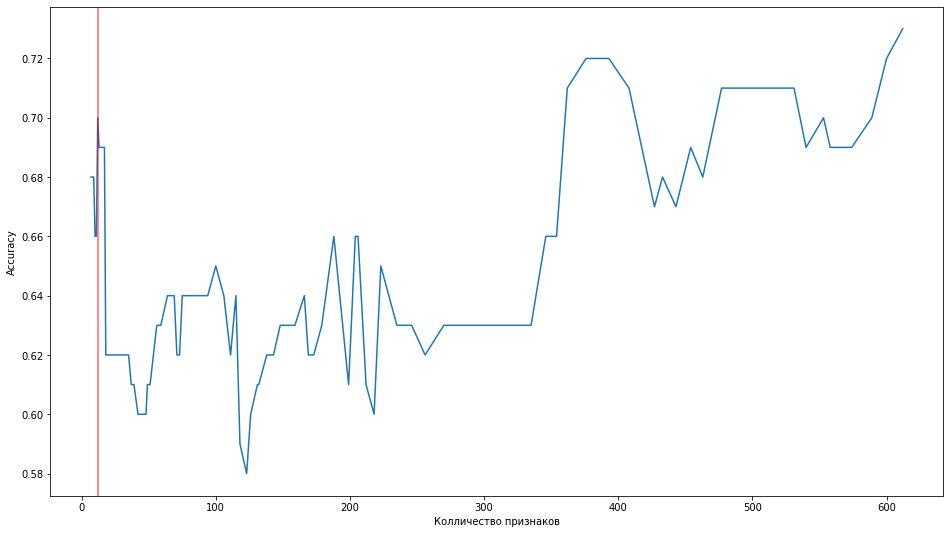

In [29]:
plt.figure(figsize=(16,9))
plt.plot(num[300:], ac[300:])
plt.axvline(x = 12, c='red', alpha=0.6)
plt.ylabel('Accuracy')
plt.xlabel("Колличество признаков")
plt.show

In [30]:
mask1 = pearson > 0.419
mask2 = pearson < -0.419
mask = mask1|mask2
len(pearson[mask].index)

12

In [31]:
ind_p = np.array(pearson[mask].index)

In [32]:
X_train_p = X_train.iloc[:, ind_p]
X_test_p = X_test.iloc[:, ind_p]

In [33]:
X_p_st = scaler.fit_transform(X_train_p)
X_test_p_st = scaler.fit_transform(X_test_p)

In [34]:
estimator.fit(X_p_st, y_train)
y_pred = estimator.predict(X_test_p_st)
print('acuracy:', accuracy_score(y_pred, y_test))

acuracy: 0.7


In [35]:
#Отбор по взаимной информации

In [36]:
ac = []
num = []
for i in range(0, 250):
    result = np.where(mutual_inf > 0.001*i)
    X_train_m = X_train_st.iloc[:, np.ravel(result)]
    X_test_m = X_test_st.iloc[:, np.ravel(result)]
    estimator.fit(X_train_m, y_train)
    y_pred = estimator.predict(X_test_m)
    num.append(len(mutual_inf[mutual_inf>0.001*i]))
    ac.append(accuracy_score(y_pred, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

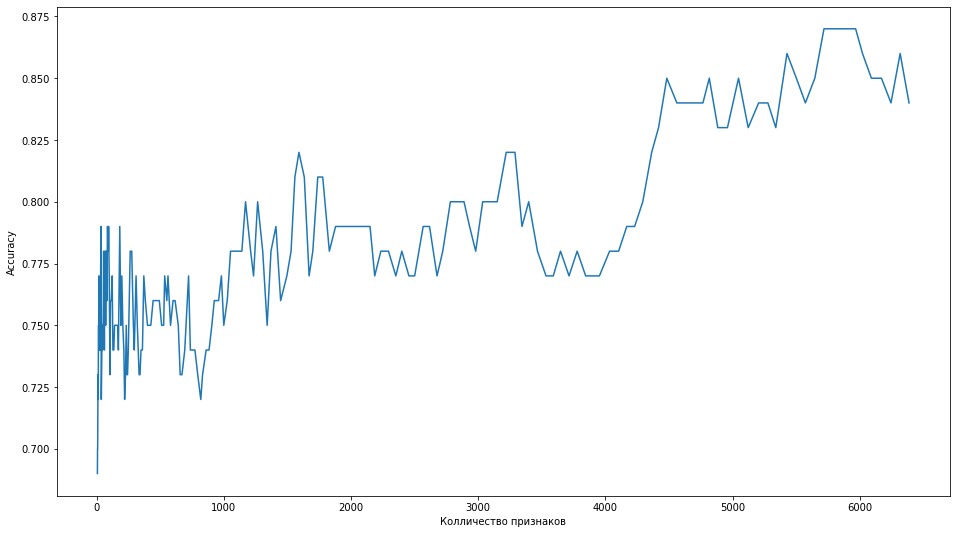

In [37]:
plt.figure(figsize=(16,9))
plt.plot(num, ac)
#plt.ylim(-0.01, 0.001)
plt.ylabel('Accuracy')
plt.xlabel("Колличество признаков")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

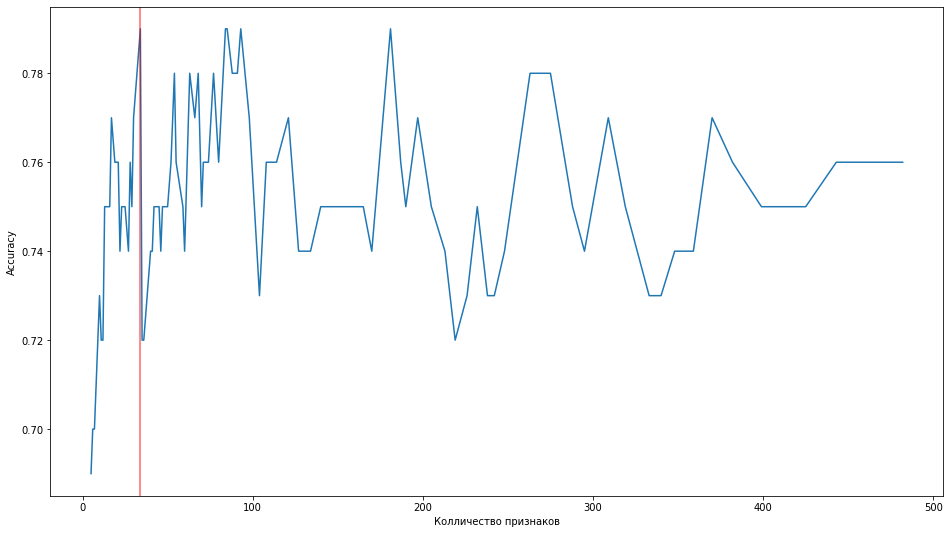

In [38]:
plt.figure(figsize=(16,9))
plt.plot(num[125:], ac[125:])
plt.axvline(x = 34, c='red', alpha=0.6)
plt.ylabel('Accuracy')
plt.xlabel("Колличество признаков")
plt.show

In [39]:
len(mutual_inf[mutual_inf>0.207])

34

In [40]:
result = np.where(mutual_inf > 0.207)

In [41]:
X_train_m = X_train.iloc[:, np.ravel(result)]
X_test_m = X_test.iloc[:, np.ravel(result)]

In [42]:
X_m_st = scaler.fit_transform(X_train_m)
X_test_m_st = scaler.fit_transform(X_test_m)

In [43]:
estimator.fit(X_m_st, y_train)
y_pred = estimator.predict(X_test_m_st)
print('acuracy:', accuracy_score(y_pred, y_test))

acuracy: 0.79


In [44]:
#Диограмма Эйлера

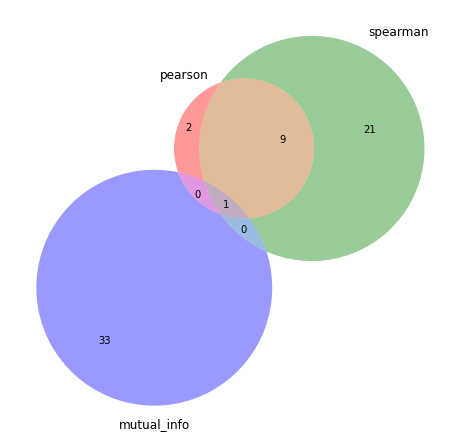

In [45]:
%matplotlib inline
plt.figure(figsize=(8,8))
from matplotlib_venn import venn3
venn3([set(ind_p), set(ind_s), set(np.ravel(result))], set_labels = ('pearson', 'spearman', 'mutual_info'))

In [46]:
s_and_p = np.intersect1d(ind_p, ind_s)
s_and_m = np.intersect1d(np.ravel(result), ind_s)
m_and_p = np.intersect1d(ind_p, np.ravel(result))

In [47]:
#Точность на всех признаках

In [48]:
X_1 = scaler.fit_transform(X_train)
X_test_st = scaler.fit_transform(X_test)

In [49]:
estimator.fit(X_1, y_train)
y_pred = estimator.predict(X_test_st)
print('acuracy:', accuracy_score(y_pred, y_test))

acuracy: 0.83


In [50]:
#Используем жадный алгоритм RFE (Recursive feature elimination, рекурсивное удаление признаков)

In [51]:
%%time
X, y = X_1, y_train
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=500, step=1)
X_tr = selector.fit_transform(X, y)
X_test_tr = selector.transform(X_test_st)

Wall time: 3min 15s


In [52]:
%%time
from tqdm import tqdm
accuracy = []
for i in tqdm(range(500)):
    X, y = X_tr, y_train
    estimator = SVC(kernel="linear")
    selector = RFE(estimator, n_features_to_select=500-i, step=1)
    X_tr = selector.fit_transform(X, y)
    X_test_tr = selector.transform(X_test_tr)
#    print(X_test_tr.shape)
    estimator.fit(X_tr, y)
    y_pred = estimator.predict(X_test_tr)
    accuracy.append(accuracy_score(y_pred, y_test))

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 162.81it/s]

Wall time: 3.14 s


<function matplotlib.pyplot.show(close=None, block=None)>

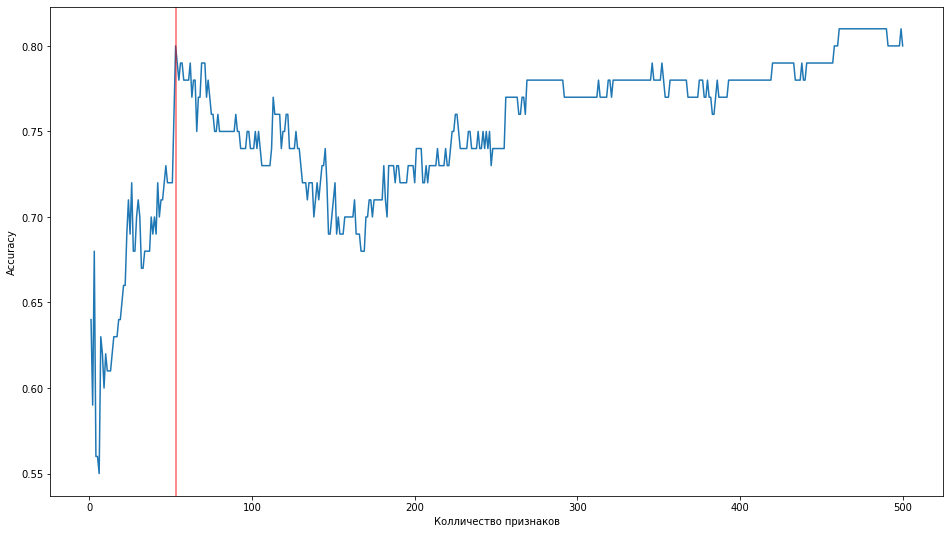

In [53]:
plt.figure(figsize=(16,9))
plt.plot(np.linspace(500, 1, 500), accuracy)
plt.axvline(x = 53, c='red', alpha=0.6)
plt.ylabel('Accuracy')
plt.xlabel("Колличество признаков")
plt.show

In [58]:
print('accuracy:', accuracy[447])

accuracy: 0.8
